# Análisis Sales



In [1]:
import polars as pl
## De principios, se tarda mucho en installarse le paquete, Seguramente instala muchas dependencias

In [2]:
import os
import pandas as pd
from datetime import datetime
import seaborn as sns
from sklearn.preprocessing import StandardScaler




import matplotlib.pyplot as plt
sns.set_theme(style="dark")


In [3]:
## Se define el directorio

project_dir = os.path.dirname(os.path.dirname(os.path.abspath(__vsc_ipynb_file__)))


project_dir 

'/Users/eduardomartinez/Documents/Proyectos/Intento/sales _kaglle'

## Se importan las bases de datos


Para esto ocuparemos polar, para irnos acostuambrando a su uso y aprender más de el. Identificar sus ventajas sobre Pandas🐼

In [4]:
train_data = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/train.csv"))



test_data = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/test.csv"))
transactions = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/transactions.csv"))
stores = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/stores.csv"))

sample_sbss = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/sample_submission.csv"))
oil_data = pl.read_csv(os.path.join(project_dir,"data/store-sales-time-series-forecasting/oil.csv"))





In [5]:
train_data = train_data.with_columns(

    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d")
)


transactions = transactions.with_columns(

    pl.col("date").str.strptime(pl.Date, format="%Y-%m-%d")
)





Nuestor objetivo es las ventas en la base train, primero nos enfocaremos en analizar esta variable y la información que contiene


In [6]:
## Se observan 5 variables, tenemos ventas por familia, y si están en promcion o no. 
## analizaremos las ventas por familia.

train_data.head(10)

id,date,store_nbr,family,sales,onpromotion
i64,date,i64,str,f64,i64
0,2013-01-01,1,"""AUTOMOTIVE""",0.0,0
1,2013-01-01,1,"""BABY CARE""",0.0,0
2,2013-01-01,1,"""BEAUTY""",0.0,0
3,2013-01-01,1,"""BEVERAGES""",0.0,0
4,2013-01-01,1,"""BOOKS""",0.0,0
5,2013-01-01,1,"""BREAD/BAKERY""",0.0,0
6,2013-01-01,1,"""CELEBRATION""",0.0,0
7,2013-01-01,1,"""CLEANING""",0.0,0
8,2013-01-01,1,"""DAIRY""",0.0,0


In [7]:
## se usa la función describe (parecida  a tidyverse) para revisar los datos

train_data.describe(

)

statistic,id,date,store_nbr,family,sales,onpromotion
str,f64,str,f64,str,f64,f64
"""count""",3.000888e6,"""3000888""",3.000888e6,"""3000888""",3.000888e6,3.000888e6
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0
"""mean""",1500443.5,"""2015-04-24 08:27:04.703000""",27.5,null,357.775749,2.60277
"""std""",866281.891642,null,15.585787,null,1101.997721,12.218882
"""min""",0.0,"""2013-01-01""",1.0,"""AUTOMOTIVE""",0.0,0.0
"""25%""",750222.0,"""2014-02-27""",14.0,null,0.0,0.0
"""50%""",1.500444e6,"""2015-04-25""",28.0,null,11.0,0.0
"""75%""",2.250665e6,"""2016-06-19""",41.0,null,195.847,0.0
"""max""",3.000887e6,"""2017-08-15""",54.0,"""SEAFOOD""",124717.0,741.0


In [8]:
for column in train_data.columns:
    print(f"Los valores unicos {column} son: ")
    
    print(train_data.select(
    
    pl.col(column).unique().alias(column)
    
).count().item()
)

Los valores unicos id son: 
3000888
Los valores unicos date son: 
1684
Los valores unicos store_nbr son: 
54
Los valores unicos family son: 
33
Los valores unicos sales son: 
379610
Los valores unicos onpromotion son: 
362


## Base Stores

In [9]:
## Tenemos 5 variables quese conectan con las base train desde store_nbr

stores.head(
    
)

store_nbr,city,state,type,cluster
i64,str,str,str,i64
1,"""Quito""","""Pichincha""","""D""",13
2,"""Quito""","""Pichincha""","""D""",13
3,"""Quito""","""Pichincha""","""D""",8
4,"""Quito""","""Pichincha""","""D""",9
5,"""Santo Domingo""","""Santo Domingo de los Tsachilas""","""D""",4


In [10]:
# tenemos más estados, no sé bien que variables tengan más relevancia dentro del modelo
for column in stores.columns:
    print( f"Los valores unico {column} son:")
    print(stores.select(
        pl.col(column).unique().alias(column)
    ).count().item(

    ))

Los valores unico store_nbr son:
54
Los valores unico city son:
22
Los valores unico state son:
16
Los valores unico type son:
5
Los valores unico cluster son:
17


# Base transacciones

In [11]:
transactions.describe()

statistic,date,store_nbr,transactions
str,str,f64,f64
"""count""","""83488""",83488.0,83488.0
"""null_count""","""0""",0.0,0.0
"""mean""","""2015-05-20 16:07:40.866000""",26.939237,1694.602158
"""std""",null,15.608204,963.286644
"""min""","""2013-01-01""",1.0,5.0
"""25%""","""2014-03-27""",13.0,1046.0
"""50%""","""2015-06-08""",27.0,1393.0
"""75%""","""2016-07-14""",40.0,2079.0
"""max""","""2017-08-15""",54.0,8359.0


In [12]:

data_modelo = train_data.join(stores, how= "left", on = "store_nbr").join(
    transactions, on = ["store_nbr", "date"]
)

In [13]:
data_modelo.describe()

statistic,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions
str,f64,str,f64,str,f64,f64,str,str,str,f64,f64
"""count""",2.755104e6,"""2755104""",2.755104e6,"""2755104""",2.755104e6,2.755104e6,"""2755104""","""2755104""","""2755104""",2.755104e6,2.755104e6
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,0.0,"""0""","""0""","""0""",0.0,0.0
"""mean""",1.5472e6,"""2015-05-20 16:07:40.866000""",26.939237,null,388.828486,2.833035,null,null,null,8.533705,1694.602158
"""std""",865553.270696,null,15.608113,null,1142.828508,12.724993,null,null,null,4.724323,963.281049
"""min""",561.0,"""2013-01-01""",1.0,"""AUTOMOTIVE""",0.0,0.0,"""Ambato""","""Azuay""","""A""",1.0,5.0
"""25%""",800745.0,"""2014-03-27""",13.0,null,0.0,0.0,null,null,null,4.0,1046.0
"""50%""",1.579776e6,"""2015-06-08""",27.0,null,17.0,0.0,null,null,null,9.0,1393.0
"""75%""",2.295215e6,"""2016-07-14""",40.0,null,230.61299,0.0,null,null,null,13.0,2079.0
"""max""",3.000887e6,"""2017-08-15""",54.0,"""SEAFOOD""",124717.0,741.0,"""Santo Domingo""","""Tungurahua""","""E""",17.0,8359.0


In [14]:
## primero una grafica para observar los datos 
## Dado que tenemos 33 familiar, agruparemos para ver la venta total
## Graficaremos las familis por ventas
# Convertir a frecuencia semanal sumando las ventas diarias
data_weekly = train_data.group_by(
    pl.col("date").dt.truncate("1w").alias("date")
).agg(
    pl.col("sales").sum().alias("Venta_total_semanal")
)

data_weekly = data_weekly.filter(
    pl.col("date") < pl.lit("2017-08-14").str.strptime(pl.Date, format="%Y-%m-%d")
)



In [15]:
data_weekly.sort("date",descending=True)


date,Venta_total_semanal
date,f64
2017-08-07,5.3854e6
2017-07-31,6.4102e6
2017-07-24,5.9218e6
2017-07-17,5.7443e6
2017-07-10,5.7485e6
…,…
2013-01-28,2.4769e6
2013-01-21,2.2722e6
2013-01-14,2.3680e6


In [16]:
import pyarrow as pa
print(pa.__version__)


17.0.0


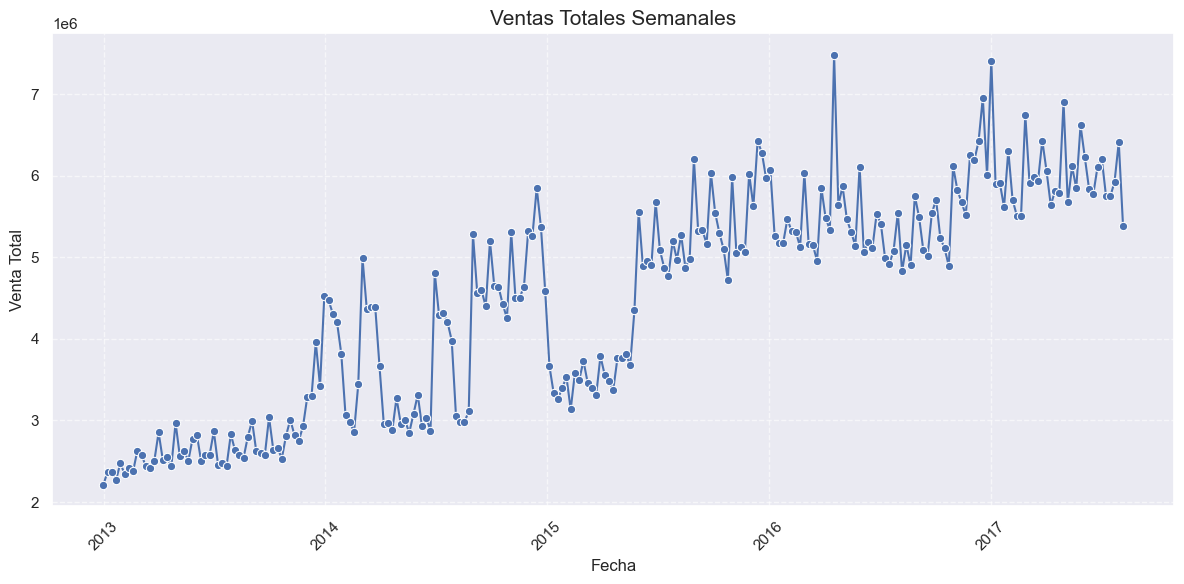

In [17]:




plt.figure(figsize = (12, 6))

sns.lineplot(data = data_weekly.to_pandas(), 
             x = "date",
             y = "Venta_total_semanal",
             
            marker = "o" )

plt.title("Ventas Totales Semanales", fontsize = 15)
plt.xlabel("Fecha")
plt.ylabel("Venta Total")

plt.xticks(rotation = 45)
# Añadir una cuadrícula ligera
plt.grid(True, linestyle="--", alpha=0.6)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se observa una crecimiento de las ventas a lo largo de la historia, durante lso periodos 2015 se tuvo una caida, que se recupero a la mitad del año. para manter su tendencia al alza. De igual manera Tenemos un pico a mdeidados de 2016 que podría se run outliers

In [18]:
## Analizemos si hay un comportamineto de ventas por nivel familiar

data_fam = train_data.group_by([
    pl.col("date").dt.truncate("1w").alias("date"),
    "family"
]).agg(
    pl.col("sales").sum().alias("Venta_total_semanal")
)


data_fam = data_fam.filter(
    
    pl.col("date") < pl.lit("2017-08-14").str.strptime(pl.Date, format="%Y-%m-%d")
)


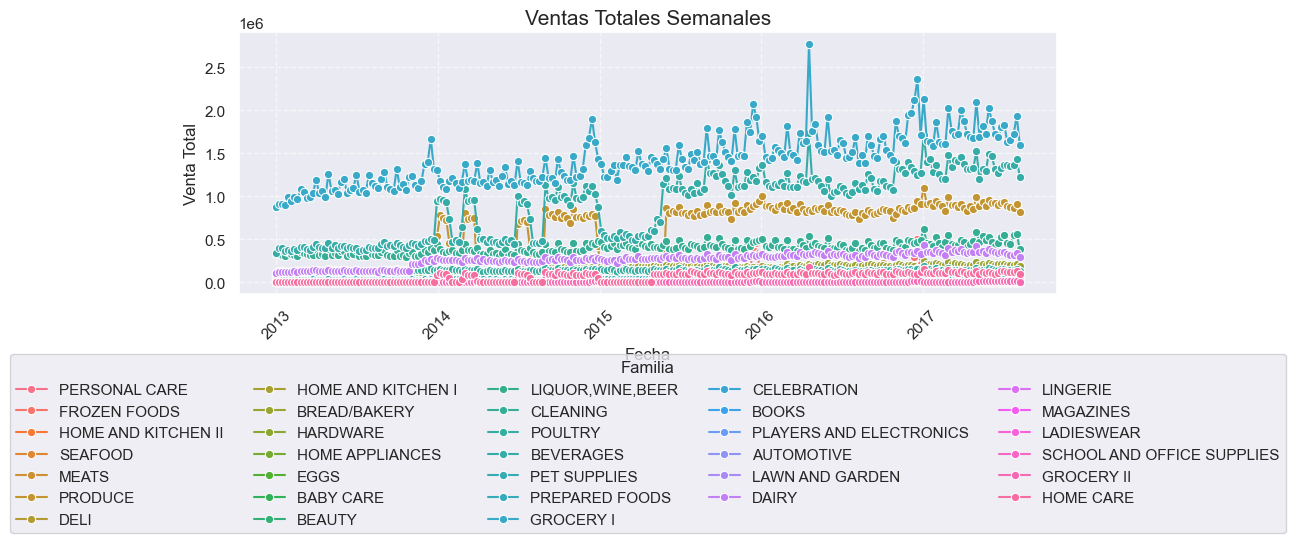

In [19]:

plt.figure(figsize = (12, 6))

sns.lineplot(data = data_fam.to_pandas(), 
             x = "date",
             y = "Venta_total_semanal",
             hue = "family",
             
            marker = "o" )

plt.title("Ventas Totales Semanales", fontsize = 15)
plt.xlabel("Fecha")
plt.ylabel("Venta Total")

plt.xticks(rotation = 45)
# Añadir una cuadrícula ligera
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Familia", bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=5)






# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [20]:

data_familia_cluster= data_fam.with_columns(
    ((pl.col("Venta_total_semanal") - pl.col("Venta_total_semanal").mean()) / pl.col("Venta_total_semanal").std()).alias("sales_estandarizada")

).group_by(
    "family"
).agg(
    pl.col("Venta_total_semanal").sum().alias("Venta_total"),

    pl.col("sales_estandarizada").std().alias("Venta_total_sd"),

).sort("Venta_total", descending = True).with_columns(
    (pl.col("Venta_total")/ pl.col("Venta_total").sum()).alias("Share")
).with_columns(
    pl.col("Share").cum_sum().alias("Sum_share")


).with_columns(
    pl.when(pl.col("Sum_share")> 0.80)
    .then(pl.lit("Otros"))
    .otherwise(pl.col("family"))
    .alias("family_grouped")
).select(["family", "family_grouped"])


In [21]:
train_data.select(
    pl.col("store_nbr")
).unique().count()

store_nbr
u32
54


In [22]:
data_store_anual = train_data.with_columns(
        pl.col("date").dt.year().alias("year"),
        pl.col("date").dt.month().alias("month")

).group_by(
    ["year","month","store_nbr"]
).agg(

    pl.col("sales").sum().alias("Ventas_Anuales")
).with_columns(
    pl.col("store_nbr").cast(pl.Utf8).cast(pl.Categorical).alias("stores_nbr"),
    (pl.col("year").cast(pl.Utf8) + "-" + pl.col("month").cast(pl.Utf8).str.zfill(2)).alias("date"),


).with_columns(
        pl.col("date").str.strptime(pl.Date, format="%Y-%m")

)

In [23]:
data_store_anual.describe()

statistic,year,month,store_nbr,Ventas_Anuales,stores_nbr,date
str,f64,f64,f64,f64,str,str
"""count""",3024.0,3024.0,3024.0,3024.0,"""3024""","""3024"""
"""null_count""",0.0,0.0,0.0,0.0,"""0""","""0"""
"""mean""",2014.857143,6.214286,27.5,355041.320173,null,"""2015-04-16 23:08:34.285000"""
"""std""",1.355486,3.384948,15.588362,273091.657234,null,null
"""min""",2013.0,1.0,1.0,0.0,null,"""2013-01-01"""
"""25%""",2014.0,3.0,14.0,178540.38999,null,"""2014-03-01"""
"""50%""",2015.0,6.0,28.0,291649.097985,null,"""2015-05-01"""
"""75%""",2016.0,9.0,41.0,444951.25399,null,"""2016-06-01"""
"""max""",2017.0,12.0,54.0,1.6336e6,null,"""2017-08-01"""


<Axes: xlabel='date', ylabel='Ventas_Anuales'>

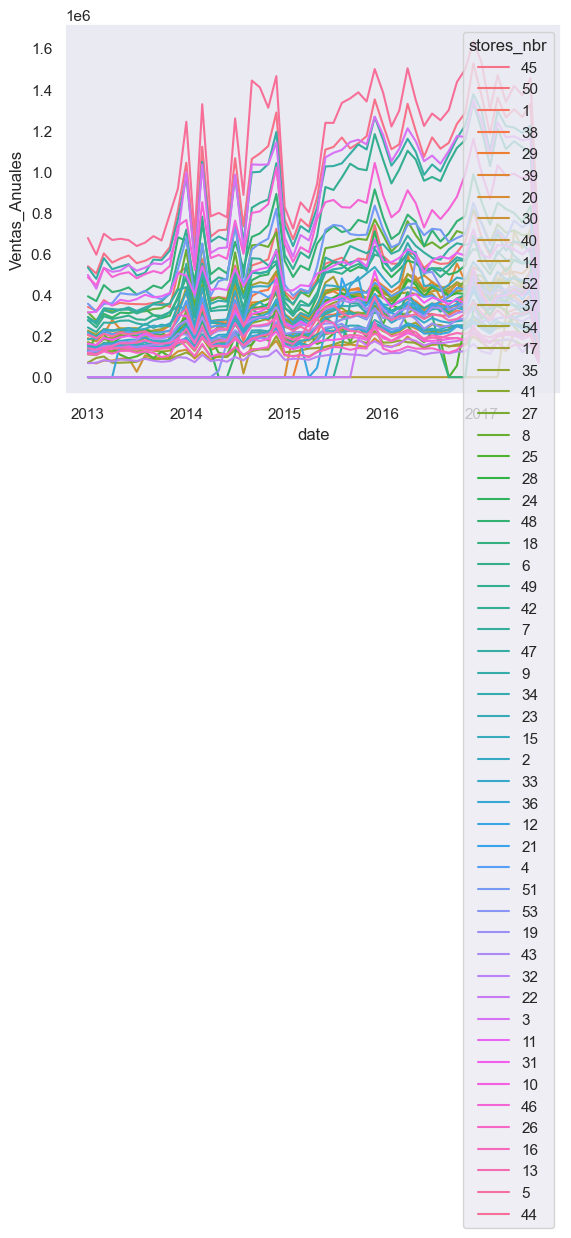

In [24]:
sns.lineplot(
    x = "date"
    , y = "Ventas_Anuales",
    hue = "stores_nbr",
    data = data_store_anual.to_pandas()

)

## Realmente no vemos una vairabiliad intesante en ventas por tienda, tal vez por transacciones nos ayude más

In [26]:
data_familia_cluster

family,family_grouped
str,str
"""GROCERY I""","""GROCERY I"""
"""BEVERAGES""","""BEVERAGES"""
"""PRODUCE""","""PRODUCE"""
"""CLEANING""","""CLEANING"""
"""DAIRY""","""DAIRY"""
…,…
"""SCHOOL AND OFFICE SUPPLIES""","""Otros"""
"""HARDWARE""","""Otros"""
"""HOME APPLIANCES""","""Otros"""


In [37]:
data_famil_sales_agg = data_modelo.join(

    data_familia_cluster, how = "left", on = "family",
    
).with_columns(
    pl.col("date").dt.year().alias("year"),
    pl.col("date").dt.month().alias("month"),

).with_columns(
        (pl.col("year").cast(pl.Utf8) + "-" + pl.col("month").cast(pl.Utf8).str.zfill(2)).alias("date"),

).group_by(
    "date",
    "family_grouped"
).agg(
    pl.col("sales").mean().alias("Venta_total"),
    pl.col("transactions").mean().alias("Transaciones_total")

)

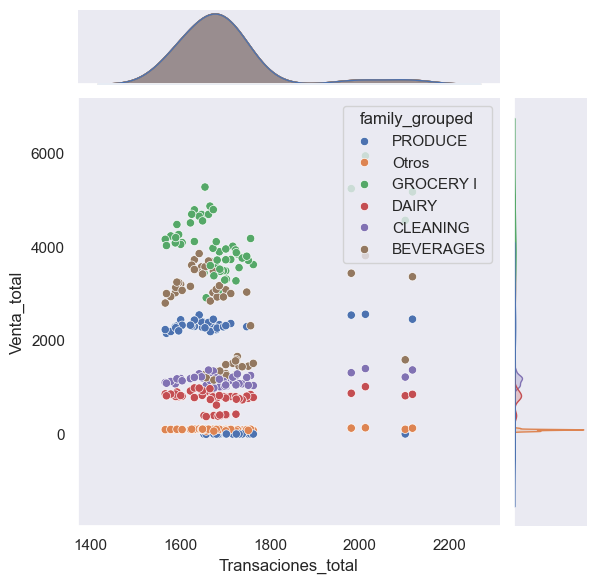

In [38]:
sns.jointplot(
    data= data_famil_sales_agg, 
    x = "Transaciones_total", 
    y = "Venta_total",
    hue = "family_grouped"
)

## Observamos que tanto family y transacciones no muestran una relación importante para las ventas, la familia nos aportaria al nivel de venta estimado.
## pero actualmente solo la familia ayudaria.

Por lo que estamos viendo en alas vairables revisadas, transaccion, familia y store. Solamente Familia nos ayuda en cierta medida a entender el nivel de venta que tendra cada tienda.
Sin embargo, las demás variables se quedán sin explicacion relevante alguna.

In [39]:
data_modelo.columns

['id',
 'date',
 'store_nbr',
 'family',
 'sales',
 'onpromotion',
 'city',
 'state',
 'type',
 'cluster',
 'transactions']

In [42]:
## Revisaremos el comportamiento por ciudad

data_ciudad_year = data_modelo.with_columns(
    pl.col("date").dt.year().alias("year")
).group_by(
    "year",
    "city"
).agg(
    pl.col("sales").sum().alias("Venta_anual")
)

In [57]:

# Calcular el total de ventas por ciudad
city_sales_totals = (
    data_ciudad_year.group_by("city")
    .agg(pl.col("Venta_anual").sum().alias("total_ventas"))
    .sort("total_ventas", descending=True)
)


# Seleccionar las 5 ciudades con mayores ventas
top_5_cities = city_sales_totals.head(5)["city"]

 # Filtrar para incluir solo las 5 ciudades principales
data_top_5 = data_ciudad_year.filter(pl.col("city").is_in(top_5_cities))

city_order = (
    data_top_5.group_by("city")
    .agg(pl.col("Venta_anual").sum().alias("total_ventas"))
    .sort("total_ventas", descending=True)["city"]
)
data_top_5.head(20)

year,city,Venta_anual
i32,str,f64
2016,"""Guayaquil""",3.3227e7
2017,"""Ambato""",6.8211e6
2014,"""Guayaquil""",2.2649e7
2016,"""Ambato""",1.0044e7
2015,"""Quito""",1.2472e8
…,…,…
2016,"""Santo Domingo""",1.0007e7
2017,"""Guayaquil""",2.1823e7
2015,"""Cuenca""",1.0510e7


In [59]:
data_modelo.to_pandas()["date"].max(
    
)

Timestamp('2017-08-15 00:00:00')

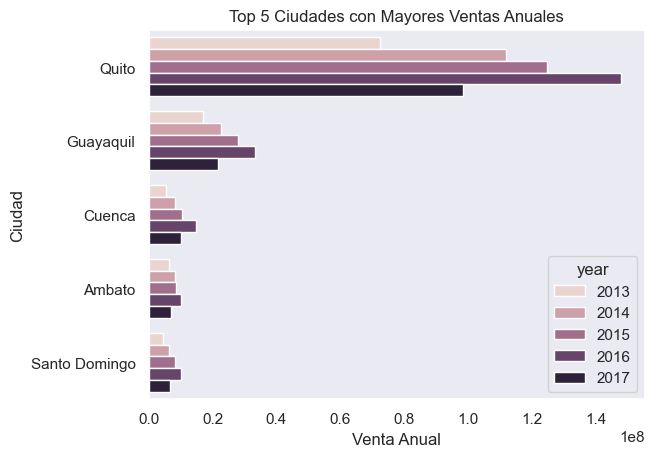

In [58]:
## Observamso que Quito es la ciudad con mayor ventas por mucho, el año  2016, prensento la mayor cantidad de ventas en 
## toda lo historia, a partir de 2017 cae, sin embargo para 2017 tenemos solo hasta agosto, por lo que perjudicaria el alcance
data_top_5_pd = data_top_5.to_pandas()


## GRafica
sns.barplot(
    data=data_top_5_pd, 
    y="city",
    x="Venta_anual",
    hue="year",
    order=city_order.to_list(),  # Ordenar las ciudades por ventas totales
    hue_order=sorted(data_top_5_pd["year"].unique())  # Ordenar los años cronológicamente
)

# Mostrar el gráfico
plt.title("Top 5 Ciudades con Mayores Ventas Anuales")
plt.xlabel("Venta Anual")
plt.ylabel("Ciudad")
plt.show()

## Ventas por mes
Vamos a analizar si hay algún patrón de estacionalidad a tráves de los años, para esto, graficaremos la suma mensual por años

In [63]:
data_month_comp = data_modelo.with_columns(
    pl.col("date").dt.month().alias("month"),
    pl.col("date").dt.year().alias("year"),

).group_by(
    "month",
    "year"
).agg(
    pl.col("sales").sum().alias("Venta_total")
)

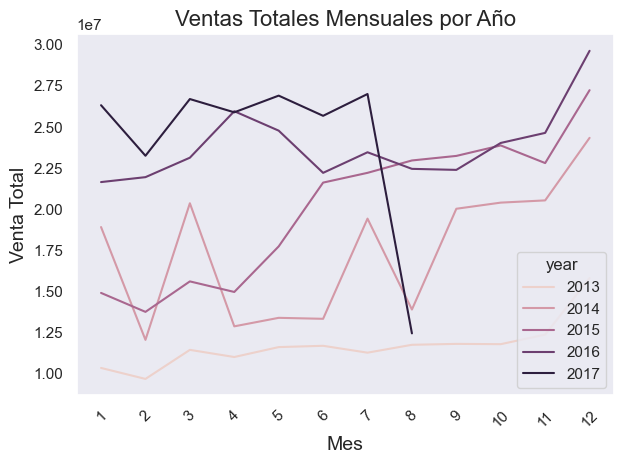

In [65]:
# Suponiendo que data_month_comp ya es un DataFrame de pandas
sns.lineplot(
    data=data_month_comp, 
    x="month", 
    y="Venta_total",
    hue="year"
)

# Asegurar que todos los valores de 'month' se muestren en el eje X
plt.xticks(ticks=data_month_comp["month"].unique(), rotation=45)

# Añadir título y etiquetas a los ejes
plt.title("Ventas Totales Mensuales por Año", fontsize=16)
plt.xlabel("Mes", fontsize=14)
plt.ylabel("Venta Total", fontsize=14)

# Ajustar el gráfico para que se vea mejor
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Realmente no hay mucha relaicon en los años, Diceimbre es el día con mayor venta en todos los años, 
## febrero presenta una caida al igual en mazo se presenta un pico, sin embargo no se ve una estacionalidad mensual en los datos 

In [66]:
data_modelo


id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions
i64,date,i64,str,f64,i64,str,str,str,i64,i64
561,2013-01-01,25,"""AUTOMOTIVE""",0.0,0,"""Salinas""","""Santa Elena""","""D""",1,770
562,2013-01-01,25,"""BABY CARE""",0.0,0,"""Salinas""","""Santa Elena""","""D""",1,770
563,2013-01-01,25,"""BEAUTY""",2.0,0,"""Salinas""","""Santa Elena""","""D""",1,770
564,2013-01-01,25,"""BEVERAGES""",810.0,0,"""Salinas""","""Santa Elena""","""D""",1,770
565,2013-01-01,25,"""BOOKS""",0.0,0,"""Salinas""","""Santa Elena""","""D""",1,770
…,…,…,…,…,…,…,…,…,…,…
3000883,2017-08-15,9,"""POULTRY""",438.133,0,"""Quito""","""Pichincha""","""B""",6,2155
3000884,2017-08-15,9,"""PREPARED FOODS""",154.553,1,"""Quito""","""Pichincha""","""B""",6,2155
3000885,2017-08-15,9,"""PRODUCE""",2419.729,148,"""Quito""","""Pichincha""","""B""",6,2155


Nos estamos quedando sin posibles candiadtos ajajja
Revisaremos autocorrelacion, posiblemente el lag de venta pasado nos pueda ayudar 
en el modelo.

In [132]:
data_store_anual.group_by(
    "stores_nbr"
).agg(
    pl.col("Ventas_Anuales").sum().alias("sales_total")
).with()

stores_nbr,sales_total
cat,f64
"""7""",2.6952e7
"""1""",1.4145e7
"""16""",1.0986e7
"""6""",2.5184e7
"""8""",3.0494e7
…,…
"""49""",4.3420e7
"""21""",9.2555e6
"""26""",7.7551e6


In [129]:
pps.score(data_modelo.join(data_familia_cluster, on = "family", how = "left").to_pandas(), "family_grouped", "sales")

{'x': 'family_grouped',
 'y': 'sales',
 'ppscore': np.float64(0.289816379873586),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': np.float64(406.84332935),
 'model_score': np.float64(288.93346846206595),
 'model': DecisionTreeRegressor()}